# UPC Quantum Engineering Final Project: Quantum Channel Discrimination

Tutor: Matteo Rosati

Students: Jesús Huerta & Albert Solana

Date: March 2021

## Introduction

Our goal consists of being able to discrimate between two-qubit amplitude damping channels.

Given an amplitude damping channel, which can be described similarly as the way a system dissipates energy, it can be characterized by an attenuation factor, we will call it $\eta$ and it can be seen as how probable it is to lose energy (excited state decay, loss of a photon,...). As we want to discriminate between two quantum channels, we will have one factor for each one, $\lambda_0$, $\lambda_1$. We will look for the optimal input state (defined by angle $\theta_{in}$ and phase $\phi_{in}$) and output measurement basis (described by $\phi_{out}$ and $\theta_{out}$), so that better identifies the channel and which $\lambda$ from the two provided is the one used.

Our project is based on the [Discriminating qubit amplitude damping channels paper](https://arxiv.org/abs/2009.01000) So, we will be checking the results we obtain to be aligned with the ones from the paper.

For this project we implement several quantum circuits, going from the most simple to more sophisticated ones that perfect the task to solve: the discrimination of the given amplitude damping channel.

As described in \[1\], an amplitude damping channel is described by the Kraus operators:

$$
E_0 =
\begin{bmatrix}
1 & 0\\
0 & \sqrt{1 - \lambda}
\end{bmatrix}
$$


$$
E_1 =
\begin{bmatrix}
0 & \sqrt{\lambda}\\
0 & 0
\end{bmatrix}
$$

here $\lambda$ relates to $\eta$ as $\lambda = sin^2 (\eta)$.

A circuit model for amplitude damping can be shown as:

![amplitude damping channel](img/damping-channel.png "Amplitude Damping Channel")

being $U_{\eta}$ as simple as the following gates (in this picture $\theta$ is equal to $\eta$):

![](img/un-gates.png)

When we launch an execution, we define the following 6 variables to solve our optimization problem that best discriminate the channel:
- Input state: angle $\theta_{in}$ and phase $\phi_{in}$, as $\Psi_{in}$ = cos $\theta_{in}$ |0$\rangle + e^{i\phi_{in}} sin  \theta_{in} |1\rangle$

- Channel attenuation factors: $\lambda_0$ and $\lambda_1$, which describe the channels an parametrize the CY gate in the circuit.

- Output measurement: $\phi_{out}$ and $\theta_{out}$, defining our measurement basis and describing the rotations last gates $R_{x}$ and $R_{y}$ perform. 

An example circuit:

![](img/base-circuit.png)

Finally, for every strategy we want to test, we proceed with the following steps:

1. **Initial State Preparation**:
As we have to provide the state values to initialize the input qubit $\psi$ we have to do a conversion from angles in the sphere to statevector amplitudes. These state vectors will be pure states, expressed as the combination of $\alpha|0\rangle\,+\,\beta|1\rangle$, where ||$\alpha||^2$ + ||$\beta||^2$ = 1. As default values, we generate 200 state vectors as a combination of 20 $\theta_{in}$ angles and 10 $\phi_{in}$ phases evenly distributed to fulfill the $2\pi$ rotations.

2. **Run the circuit and do the measurement**:
For every input qubit state, we set the circuit applying the passed $\lambda$ as attenuation degree and $\phi_{out}$ and $\theta_{out}$ as the measurement rotations.

3. **Results Analysis**:
For each strategy, we show the following analysis:
- Impact of the amplitude damping channel attenuation comparing the input and output probabilites
- Effect of the amplitude damping channel attenuation on the Bloch sphere
- Computing the amplitude damping channel fidelity

Since all previous results are performed on an ideal noiseless quantum simulator, we also provide some **extended results**:
- Effect of the amplitude damping channel attenuation on the Bloch sphere on a real IBMQ Quantum device (only for a few points)
- Effect of the amplitude damping channel attenuation on the Bloch sphere adding a noise model to the quantum simulation


## One-shot Discrimination



In [119]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

import numpy as np
from numpy import pi
import math
from src.quantum_channel_discrimination import plot_probabilities2, run_base_circuit, plot_surface_probabilities, plot_wireframe_blochs, plot_surface_blochs, plot_fidelity
import warnings
warnings.filterwarnings('ignore')

In [120]:
points_theta = 20  # Points of Theta angle (pi/2) in Bloch sphere - min 2
points_phase = 10  # Points of Phase angle (2*pi) in Bloch sphere - min 2
# angles shift from first parameter, to the second one, with jumps using the third parameter
angles_eta = np.append(np.arange(0, np.pi/2, np.pi/(points_theta*points_phase)), np.pi/2)
lambdas = list(map(lambda eta : np.round(math.sin(eta)**2, 3), angles_eta))
out_rx_angle=0
out_ry_angle=0

(initialStates, totalResults, totalCounts, totalCircuits, totalFinalStates, 
 anglesPhase, Z_Output0, Z_Output1, X_Input0, X_Input1, Y_Eta, 
 initialStatesReshaped, allChannelsFinalStatesReshaped, eta_degrees, lambdas_per_state) = run_base_circuit(angles_eta=angles_eta, 
                                                                                                 points_theta=points_theta, 
                                                                                                 points_phase=points_phase, 
                                                                                                 iterations=2000, 
                                                                                                 out_rx_angle=out_rx_angle, 
                                                                                                 out_ry_angle=out_ry_angle)

Simulating channel with λ = 0.00
Simulating channel with λ = 0.02
Simulating channel with λ = 0.10
Simulating channel with λ = 0.21
Simulating channel with λ = 0.35
Simulating channel with λ = 0.50
Simulating channel with λ = 0.65
Simulating channel with λ = 0.79
Simulating channel with λ = 0.90
Simulating channel with λ = 0.98
Simulating channel with λ = 1.00


### Initial base circuit with Input $\psi = \alpha|0\rangle\, +\, \beta|1\rangle$ with $\lambda=0$, $\phi_{out}=0$ and $\theta_{out}=0$

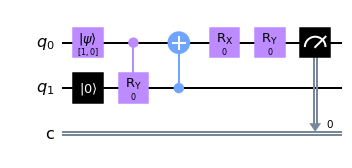

In [90]:
totalCircuits[0][0].draw('mpl')

### Impact of the amplitude damping channel attenuation comparing the input and output probabilites
#### For all 200 Input States, from $\lambda=0$ to $\lambda=1$ and output measurement to $\phi_{out}=0$ and $\theta_{out}=0$

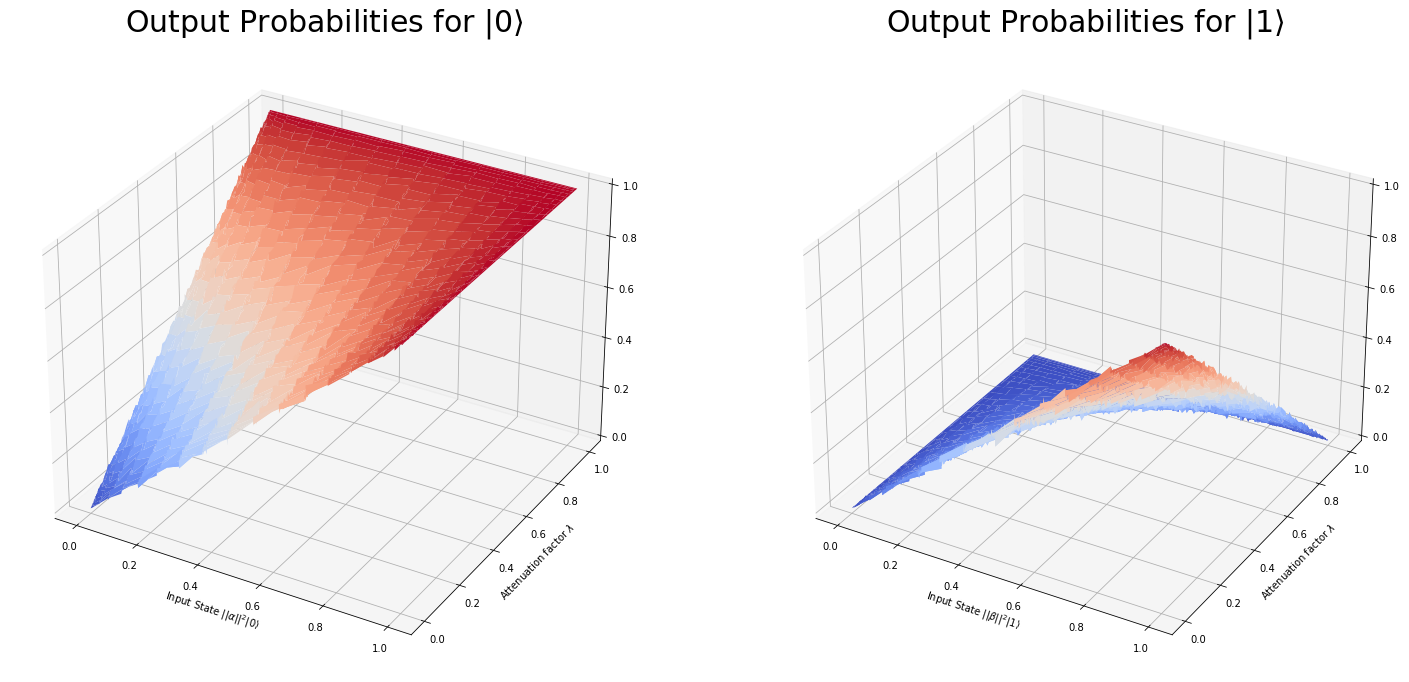

In [121]:
plot_surface_probabilities(X_Input0, X_Input1, Z_Output0, Z_Output1, lambdas_per_state)

These 2 pictures show the probabilities of obtaining as a result of the measurement (in computational basis) a |0$\rangle$ or a |1$\rangle$. Each of these output probabilities for |0$\rangle$ or a |1$\rangle$ are represented with regard to the square of input amplitude (which is equivalent to the probability) for |0$\rangle$ and |1$\rangle$, respectively. The other axis included is the $\lambda$ for each circuit simulated.

As expected, when $\lambda$=0, (we don't introduce any attenuation), we should see the same probability for the output as the input state. That's why we can see represented a function equivalent to x = z for $\lambda$=0, as our x for each graph represents the probability of |0$\rangle$ and |1$\rangle$ respectively.

On the opposite side, when we have $\lambda$=1, we get always a probability equal to 1 to measure the state |0$\rangle$, and therefore no probability at all to obtain |1$\rangle$ as a result of the measurement.  

### Effect of the amplitude damping channel attenuation on the Bloch sphere
#### For all 200 Input States, from 8 channels $\lambda=0$ to $\lambda=1$ and output measurement to $\phi_{out}=0$ and $\theta_{out}=0$

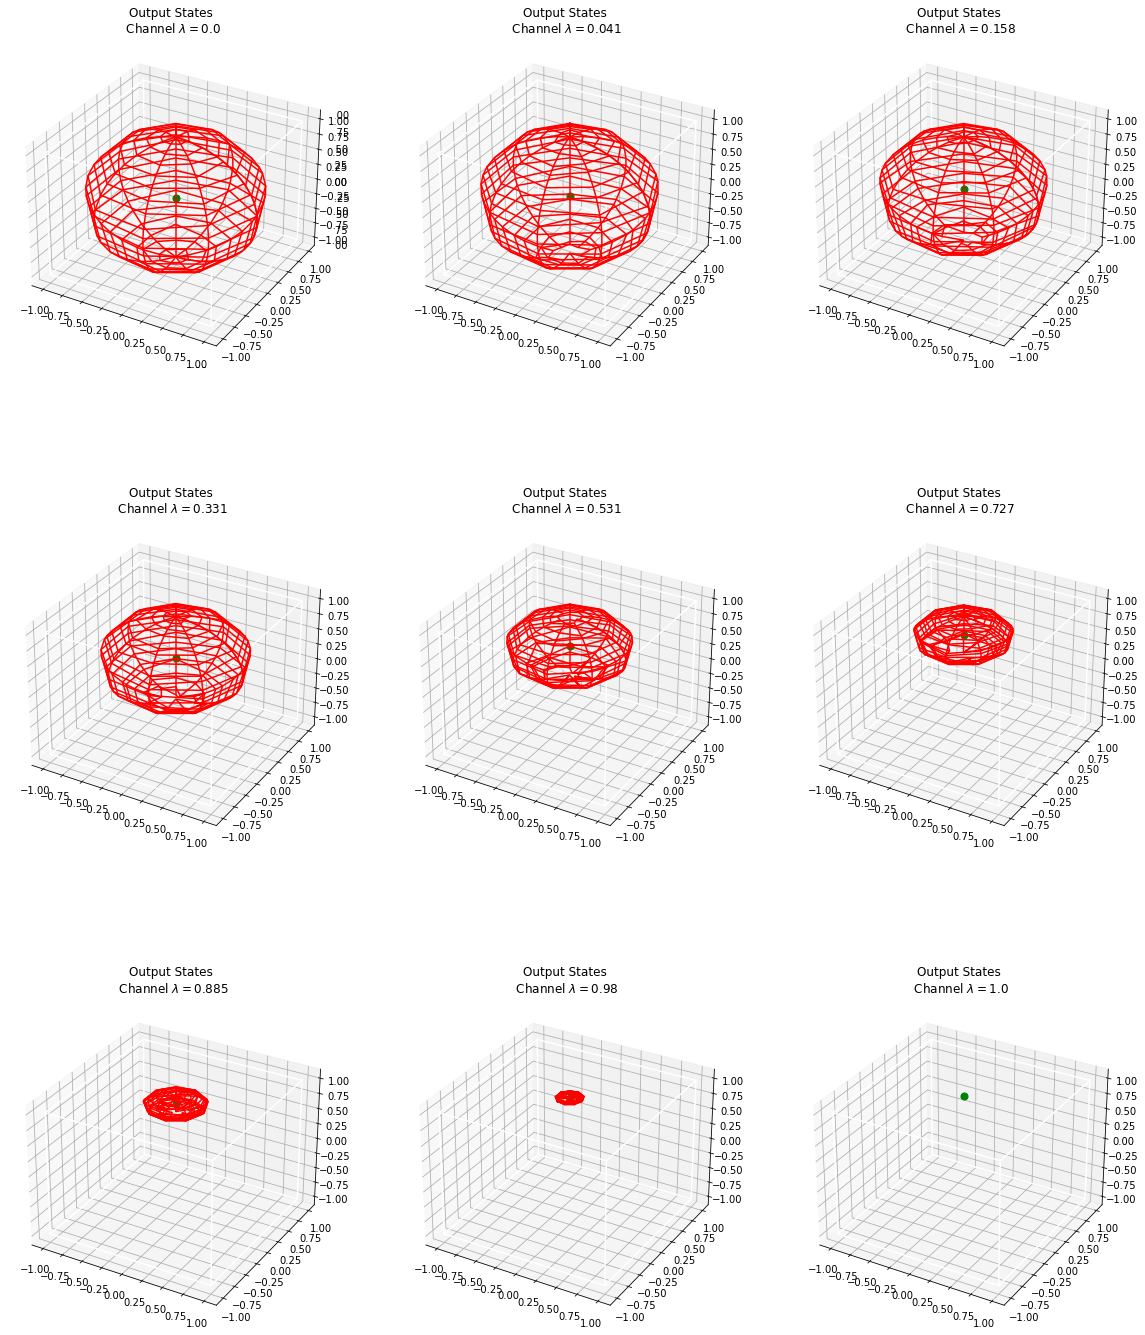

In [122]:
plot_wireframe_blochs(allChannelsFinalStatesReshaped, lambdas, rows=3, cols=3)

Here we see the Bloch sphere, represented by all the initial states (in green) we pass through the channels. This green sphere is a Bloch sphere, as all their points represented are pure states, meaning this sphere has a radius of 1 in all directions.

All other spheres (in red) are the result of representing the final states we obtain after passing the channel. We observe the channel has the effect of compress and move the Bloch sphere towards the |0$\rangle$ state. In fact, this effect is bigger as much as the $\lambda$ value moves from 0 to 1, as shown in the graphs above. 

- For $\lambda = 0$, the channel has no effect on the initial states. This is an ideal situation as we are simulating it, ignoring at this point any noise effect. As the final states are the same as the initial ones, we recover the same Bloch sphere. This situation is equivalent to a 'lossless system' with no attenuation present.

- For $\lambda = 1$, we see all values of the Bloch sphere will converge towards the |0$\rangle$ state. This is coherent with our previous results about probabilities. This circuit will have 100% probabilities of measure |0$\rangle$, while none to observe any |1$\rangle$. In fact, we also see how the center of the sphere, in this case extremal case, is located at the |0$\rangle$, so we will be unable to recover any information we put in our initial states or to go back. This scenario can well describe a 'full lossy system'.

- For $\lambda$ values, such that $0 < \lambda < 1$, we see how the Bloch sphere is compressed and the center of the resultant sphere moves up. This is because the initial amplitudes for |0$\rangle$ ($\alpha$) are preserved. In fact, we can see the final states conserve these initial states $\alpha$ component. So, the final states are mixed states. Another effect easily observable is this shrinked sphere, is not a sphere. The values for coordinates x and y (horizontal plane) reduce slower than z (vertical axys). In fact, we can compute the rate of reduction for each axis and we see the following relationship, which is found also in \[1\] formula 8.122.



$$
(X_{in}, Y_{in}, Z_{in})  \longrightarrow (X_{in} cos(\eta), Y_{in} cos(\eta), Z_{in} cos^2(\eta))
$$


### Computing the amplitude damping channel fidelity
Fidelity calculation gives us an estimation about how similar (or dissimilar) two state vectors are. In our analysis, we will do two fidelity computations to compare:
 - the final state vectors versus the initial states provided to the channel
 - the final state vectors versus the |0$\rangle$ (as we have seen this is invariant)

#### For all 200 Input States, from 10 channels $\lambda=0$ to $\lambda=\pi$ and output measurement to $\phi_{out}=0$ and $\theta_{out}=0$

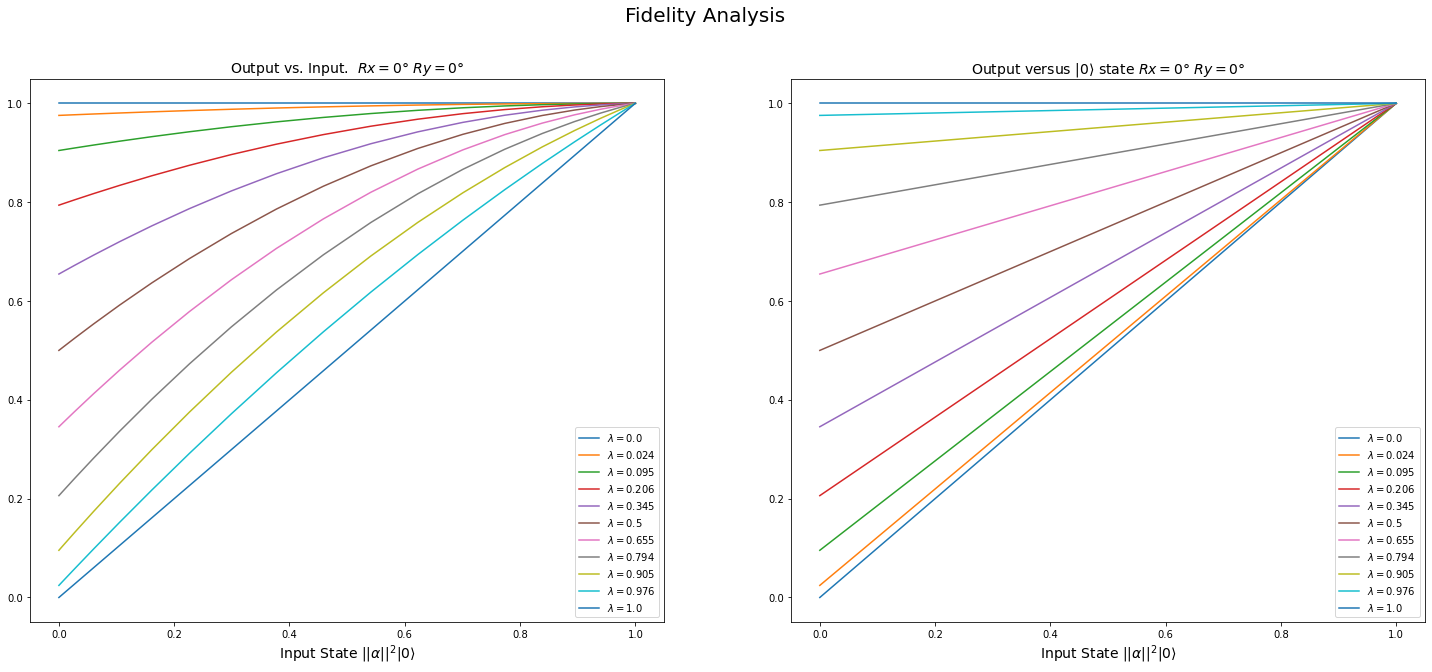

In [123]:
plot_fidelity(angles_eta, pointsTheta=points_theta)

Fidelity has been represented in the vertical axis, while x shows the values of ||$\alpha||^2$. By the previous section, remember these ||$\alpha||^2$ represented here for input states, are the same obtained for final states, as the component for |0$\rangle$ is preserved through the channel.

In the figure on the left we see the fidelity between the input states and the final states for a set of values of $\lambda$ (different channels), and several lines appear. All of them show fidelity (y axis) equal to 1 when ||$\alpha||^2$ (x axis) is equsl to 0, meaning that if our input (initial state) is |0$\rangle$, we will have the same  state at the end (same state ==> fidelity = 1). This is consistent whith previous results as |0$\rangle$ component doesn't change in any amplitude damping channel.
For the specific case of $\lambda$ = 0, we see fidelity is equal to 1 for any value of ||$\alpha||^2$, as we are not doing any modification to any state, i.e. we get what we put in the channel.
For all other values of $\lambda$ (0 < $\lambda$ < 1) we see how fidelity goes down as the ||$\alpha||^2$ moves to zero and goes lower as the values of $\lambda$ are closer to 1. This is in line with our previous observations. We are introducing pure states, and they fulfill ||$\alpha||^2$ + ||$\beta||^2$ = 1, so as the initial contribution to |1$\rangle$ is bigger (i.e. ||$\alpha||^2$ lower) we will observe a reduction of the fidelity, as the initial state will be more affected by the amplitude damping effect. Also, as the value of $\lambda$ increases, fidelity goes down for same ||$\alpha||^2$ value, showing the equivalent effect as we saw with the Bloch sphere shrinking.

The figure on the right shows the fidelity between the final states and the state |0$\rangle$. We see only one line for all values of $\lambda$. The interpretation for this result has his explanation on the fact we are using ||$\alpha||^2$ to represent the fidelity values. In fact, it is right, the fidelity of the final states versus the |0$\rangle$ is proportional to the value of ||$\alpha||^2$, which is invariant for any damping channel (||$\alpha||_{in} = ||\alpha||_{out}$). As mentioned before, the initial states will preserve the $\alpha$ amplitude, and therefore, all $\alpha$ will be the same for any value of $\lambda$, i.e. any channel. 

### Running the experiment on a real IBMQ device

We did an experiment of testing the damping channel circuit on a real IBM noisy device to see how the noise coming from the device itself affects the ideal noiseless results. 

For doing that, we launched first a 36 input states on a noiseless simulation device, plotting the resuling states on the Bloch Sphere:

![](img/plot-simulation.png)

Then, we launch a similar experiment on a real **IBM Athens** device:

![](img/ibmq-real.png)


Comparing both experiments Bloch spheres' results, we can see how the noise effect is translated into a deformation of the sphere, making more difficult to separate the attenuation factor coming from the damping channel and the noise from the real device.

### Another alternative: adding a Noise Model from a mocked IBMQ device to simulate the noise into the execution

The previous execution had only 36 initial states because every execution is costly in time, which depends on how busy are the IBM real quantum devices, but usually each execution is queued during one hour. 

IBM Qiskit offers an alternative to add the noise model of a specific IBM Quantum device into your simulated execution, which can be run directly on the qasm simulator without queues. 

For instance, in the following execution we take the mocked noise model from Athens and run a complete 200 input states executions for a $\lambda=0.5$

Simulating channel with η = 90°


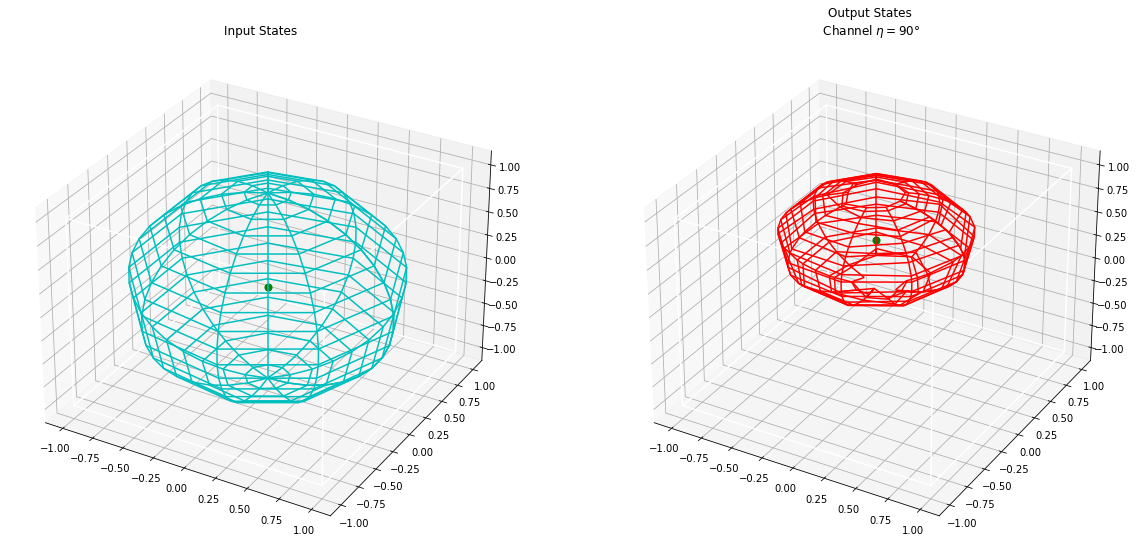

In [8]:
from qiskit.test.mock import FakeAthens
from qiskit.providers.aer import QasmSimulator

athens_noisy_backend = FakeAthens()
athens_noisy_simulator = QasmSimulator.from_backend(athens_noisy_backend)

new_points_theta = 20  # Points of Theta angle (pi) in Bloch sphere - min 2
new_points_phase = 10  # Points of Phase angle (2*pi) in Bloch sphere - min 2
new_angles_eta = [pi/2]
new_out_rx_angle=0
new_out_ry_angle=0

initialStates, totalResults, totalCounts, totalCircuits, totalFinalStates, anglesPhase, Z_Output0, Z_Output1, X_Input0, X_Input1, Y_Eta, initialStatesReshaped, allChannelsFinalStatesReshaped, eta_degrees = run_base_circuit(angles_eta=new_angles_eta, points_theta=new_points_theta, points_phase=new_points_phase, iterations=2000, out_rx_angle=new_out_rx_angle, out_ry_angle=new_out_ry_angle, backend=athens_noisy_simulator)

plot_wireframe_blochs(initialStatesReshaped, allChannelsFinalStatesReshaped, new_angles_eta, rows=1, cols=2)

## What's next?

Launch a classical and VQA optimization to find the optimal values for the 6 input values (input state, $\eta$ attenuation channel, and output measurement angles) that maximizes the probability of discriminating the amplitude damping channel.

## References

- \[1\] Nielsen & Chuang. Section 8.3.5